In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import random 
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:/Users/satya/OneDrive/Desktop/Project Dataset')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,MaxPooling2D

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()
cur_path

'C:\\Users\\satya\\OneDrive\\Desktop\\Project Dataset'

In [3]:
os.chdir('C:/Users/satya/OneDrive/Desktop/Project Dataset')

In [4]:
cur_path = os.getcwd()
cur_path

'C:\\Users\\satya\\OneDrive\\Desktop\\Project Dataset'

# Pre processing and Visulaisation the images

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [6]:
# Converting lists into numpy arrays

In [7]:
data = np.array(data)
labels = np.array(labels)

In [8]:
os.chdir('C:/Users/satya/OneDrive/Desktop/Project Dataset/Train')

In [9]:
cur_path = os.getcwd()
cur_path

'C:\\Users\\satya\\OneDrive\\Desktop\\Project Dataset\\Train'

In [10]:
# Visulaisation

Text(0, 0.5, 'Number of images')

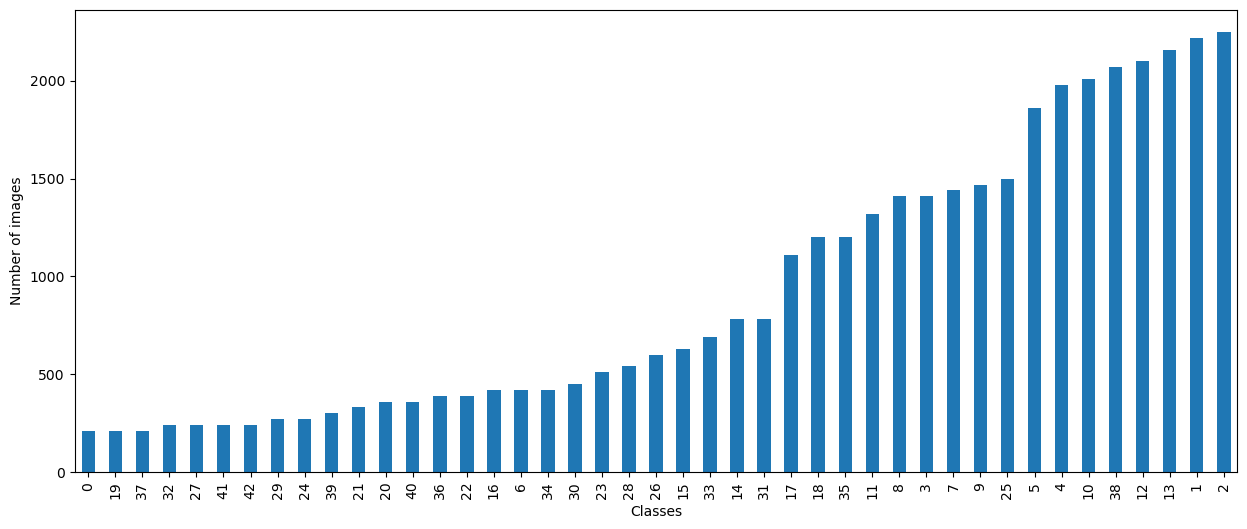

In [11]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31367, 30, 30, 3), (7842, 30, 30, 3), (31367,), (7842,))

# PRE PROCESSING:

# Convert the image to grayscale

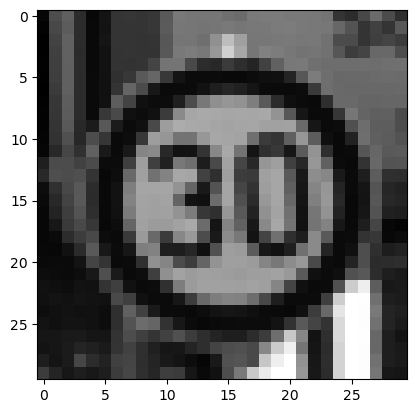

In [14]:
def grayscale(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return image

img = grayscale(X_train[776])
plt.imshow(img, cmap = plt.get_cmap('gray'))

##  histogram equalization

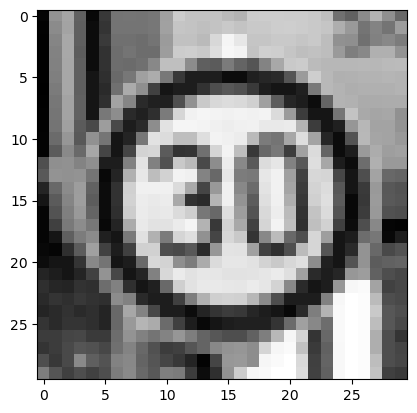

In [15]:
def equalize(image):
    image = cv2.equalizeHist(image)
    return image
img = equalize(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [16]:
def processing(image):
    gray_img = grayscale(image)
    img = equalize(gray_img) 
    img = img/255
    return img

## convert all train, test and validation dataset to grayscale & histogram technique

In [17]:
train_x = np.asarray(list(map(processing, X_train)))
test_x = np.asarray(list(map(processing, X_test)))

In [18]:
y_train.shape

(31367,)

In [19]:
train_x.shape[0]

31367

# Reshape data to 3 dimensional


In [20]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)

In [21]:
y_train.shape

(31367,)

# Generate some datasets with different angles using Keras Imagedatagenerator

In [22]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
datagen.fit(train_x)
#batches = datagen.flow(train_x,train_y,batch_size=15)

# One-hot encode the labels

In [23]:
y_train = to_categorical(y_train,43)
y_test= to_categorical(y_test,43)


In [24]:
y_train.shape

(31367, 43)

In [25]:
train_x.shape

(31367, 30, 30, 1)

# Define the Model

In [26]:
from keras.layers import ReLU
def build_model():
    model = Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(train_x.shape[1],train_x.shape[2],train_x.shape[3])))
    model.add(ReLU())
    model.add(Conv2D(60,(5,5)))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(30,(3,3)))
    model.add(ReLU())
    model.add(Conv2D(30,(3,3)))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    
    model.compile(Adam(lr=0.001), loss="categorical_crossentropy",metrics=["accuracy"])
    return model
    

In [27]:
model = build_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 60)        1560      
                                                                 
 re_lu (ReLU)                (None, 26, 26, 60)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 60)        90060     
                                                                 
 re_lu_1 (ReLU)              (None, 22, 22, 60)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 30)          16230     
                                                        

In [28]:
from keras.callbacks import EarlyStopping
earlstop=EarlyStopping(patience=10, monitor='accuracy')

In [29]:
epochs = 3
history = model.fit(train_x, y_train, batch_size=32, epochs=epochs, validation_data=(test_x, y_test), callbacks=[earlstop])

Epoch 1/3



981/981 [==============================] - 80s 79ms/step - loss: 0.7921 - accuracy: 0.7735 - val_loss: 0.1374 - val_accuracy: 0.9605
Epoch 2/3
981/981 [==============================] - 76s 78ms/step - loss: 0.1611 - accuracy: 0.9514 - val_loss: 0.1040 - val_accuracy: 0.9711
Epoch 3/3
981/981 [==============================] - 77s 78ms/step - loss: 0.1042 - accuracy: 0.9677 - val_loss: 0.0793 - val_accuracy: 0.9769


In [30]:
train_x.shape, y_train.shape, test_x.shape, y_test.shape

((31367, 30, 30, 1), (31367, 43), (7842, 30, 30, 1), (7842, 43))

Text(0, 0.5, 'loss')

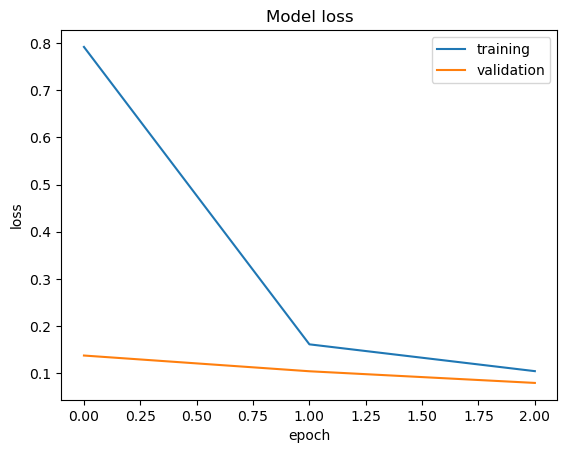

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

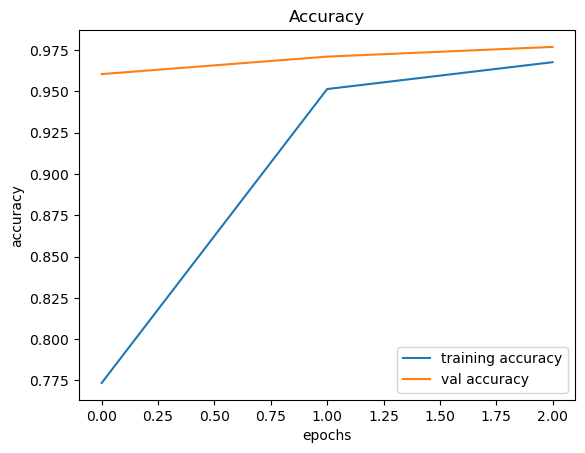

In [32]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [33]:
score = model.evaluate(test_x, y_test , verbose = 0)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])

The test score is:  0.07925695180892944
The Accuracy score is:  0.9769191741943359


In [34]:
os.chdir('C:/Users/satya/OneDrive/Desktop/Project Dataset')

In [35]:
# On Test Data

In [36]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [37]:
X_test, label = testing('Test.csv')

In [38]:
# Preprocess the images
X_test_processed = []
for img in X_test:
    img_processed = processing(img)  # Using your preprocessing function
    X_test_processed.append(img_processed)

# Convert the list of preprocessed images to a NumPy array
X_test_processed = np.array(X_test_processed)

# Print the shape of X_test_processed and the label to verify
print("Shape of X_test_processed:", X_test_processed.shape)
print("Shape of label:", label.shape)

Shape of X_test_processed: (12630, 30, 30)
Shape of label: (12630,)


In [39]:
predict_x=model.predict(X_test_processed) 
classes_x=np.argmax(predict_x,axis=1)


395/395 [==============================] - 9s 23ms/step


In [40]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(label, classes_x))

0.9428345209817894


In [41]:
model.save("./training/TSR.h5")

C:\Users\satya\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
print(classification_report(label, classes_x))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        60
           1       0.95      0.96      0.96       720
           2       0.95      0.98      0.96       750
           3       0.96      0.90      0.93       450
           4       0.91      0.97      0.94       660
           5       0.90      0.93      0.91       630
           6       1.00      0.76      0.86       150
           7       0.95      0.92      0.93       450
           8       0.98      0.89      0.94       450
           9       0.99      0.99      0.99       480
          10       0.99      0.98      0.99       660
          11       0.92      0.95      0.93       420
          12       0.96      0.98      0.97       690
          13       0.99      0.99      0.99       720
          14       1.00      0.99      1.00       270
          15       0.90      0.91      0.91       210
          16       0.98      1.00      0.99       150
          17       0.99    

In [43]:

import os
#os.chdir(r'D:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [44]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [45]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    X_test_processed = []
    for img in X_test:
        img_processed = processing(img)  
        X_test_processed.append(img_processed)
    X_test_processed = np.array(X_test_processed)
    predict_x=model.predict(X_test_processed) 
    Y_pred=np.argmax(predict_x,axis=1)
    return image,Y_pred


1/1 [==============================] - 0s 149ms/step
Predicted traffic sign is:  Speed limit (70km/h)


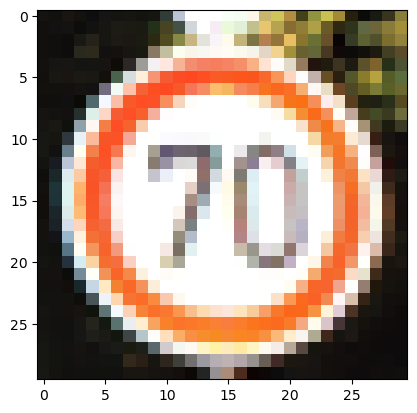

In [46]:
plot,prediction = test_on_img("C:/Users/satya/OneDrive/Desktop/Project Dataset/Train/4/00004_00002_00029.png")
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [47]:
def image_processing(img):
    model = load_model('./training/TSR.h5')
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    X_test_processed = []
    for img in X_test:
        img_processed = processing(img)  
        X_test_processed.append(img_processed)
    X_test_processed = np.array(X_test_processed)
    predict_x=model.predict(X_test_processed) 
    Y_pred=np.argmax(predict_x,axis=1)
    return Y_pred

In [48]:
file = "C:/Users/satya/Downloads/turnleft.png"
result = image_processing(file)
s = [str(i) for i in result]
a = int("".join(s))
result = "Predicted Traffic🚦Sign is: " +classes[a]

1/1 [==============================] - 0s 126ms/step


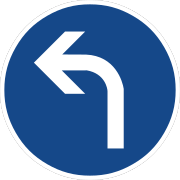

Predicted Traffic🚦Sign is: Turn left ahead


In [49]:
with Image.open(file) as image:
    width, height = image.size
    display(image)
print(result)

In [50]:
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [51]:
import numpy as np
import cv2

In [52]:
frameWidth= 640         
frameHeight = 480
brightness = 180
threshold = 0.75         
font = cv2.FONT_HERSHEY_SIMPLEX

In [53]:
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

True

In [54]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img =cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [55]:
def getCalssName(classNo):
    if   classNo == 0: 
        return 'Speed Limit 20 km/h'
    elif classNo == 1: 
        return 'Speed Limit 30 km/h'
    elif classNo == 2: 
        return 'Speed Limit 50 km/h'
    elif classNo == 3: 
        return 'Speed Limit 60 km/h'
    elif classNo == 4: 
        return 'Speed Limit 70 km/h'
    elif classNo == 5: 
        return 'Speed Limit 80 km/h'
    elif classNo == 6: 
        return 'End of Speed Limit 80 km/h'
    elif classNo == 7: 
        return 'Speed Limit 100 km/h'
    elif classNo == 8: 
        return 'Speed Limit 120 km/h'
    elif classNo == 9: 
        return 'No passing'
    elif classNo == 10: 
        return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: 
        return 'Right-of-way at the next intersection'
    elif classNo == 12: 
        return 'Priority road'
    elif classNo == 13: 
        return 'Yield'
    elif classNo == 14: 
        return 'Stop'
    elif classNo == 15: 
        return 'No vechiles'
    elif classNo == 16: 
        return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: 
        return 'No entry'
    elif classNo == 18: 
        return 'General caution'
    elif classNo == 19: 
        return 'Dangerous curve to the left'
    elif classNo == 20: 
        return 'Dangerous curve to the right'
    elif classNo == 21: 
        return 'Double curve'
    elif classNo == 22: 
        return 'Bumpy road'
    elif classNo == 23: 
        return 'Slippery road'
    elif classNo == 24: 
        return 'Road narrows on the right'
    elif classNo == 25: 
        return 'Road work'
    elif classNo == 26: 
        return 'Traffic signals'
    elif classNo == 27: 
        return 'Pedestrians'
    elif classNo == 28: 
        return 'Children crossing'
    elif classNo == 29: 
        return 'Bicycles crossing'
    elif classNo == 30: 
        return 'Beware of ice/snow'
    elif classNo == 31: 
        return 'Wild animals crossing'
    elif classNo == 32: 
        return 'End of all speed and passing limits'
    elif classNo == 33: 
        return 'Turn right ahead'
    elif classNo == 34: 
        return 'Turn left ahead'
    elif classNo == 35: 
        return 'Ahead only'
    elif classNo == 36: 
        return 'Go straight or right'
    elif classNo == 37: 
        return 'Go straight or left'
    elif classNo == 38: 
        return 'Keep right'
    elif classNo == 39: 
        return 'Keep left'
    elif classNo == 40: 
        return 'Roundabout mandatory'
    elif classNo == 41: 
        return 'End of no passing'
    elif classNo == 42: 
        return 'End of no passing by vechiles over 3.5 metric tons'

In [56]:
while True:
    success, imgOrignal = cap.read()
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (30, 30))
    img = preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 30, 30, 1)
    cv2.putText(imgOrignal, "CLASS: ", (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    #cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
# PREDICT IMAGE
    predictions = model.predict(img)
    classes_x=np.argmax(predictions,axis=1)
    probabilityValue = np.amax(predictions)
    if probabilityValue > threshold:
        cv2.putText(imgOrignal, str(classes_x) + " " + str(getCalssName(classes_x)), (120, 35), font, 0.75, (0, 0, 255), 2,cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue * 100, 2)) + "%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)

    if cv2.waitKey(1) and 0xFF == ord('q'):
        break

1/1 [==============================] - 0s 26ms/step


KeyboardInterrupt: 

In [ ]:
import numpy as np
print(img.dtype)